Practical 4 : Data Analytics-I: Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset. The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('boston.csv')
df

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


About dataset

● CRIM: Crime rate by town

● ZN: Proportion of residential land zoned for large plots

● INDUS: Proportion of non-retail business acres per town

● CHAS: Charles River dummy variable (1 if tract bounds river, 0 otherwise)

● NOX: Nitrogen oxide concentration (parts per 10 million)

● RM: Average number of rooms per dwelling

● AGE: Proportion of homes built before 1940

● DIS: Weighted distance to employment centers

● RAD: Index of accessibility to radial highways

● TAX: Property tax rate per $10,000

● PTRATIO: Pupil-teacher ratio by town

● B: Proportion of residents of African American descent

● LSTAT: Percentage of lower status population

● MEDV: Median value of owner-occupied homes (target variable)

In [3]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


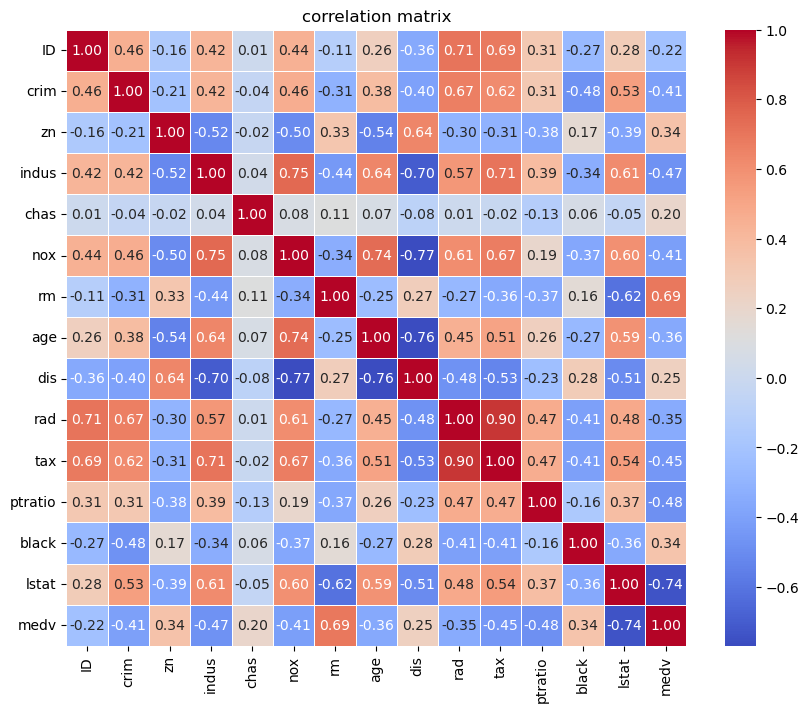

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt='.2f', linewidths = 0.5)
plt.title('correlation matrix')
plt.show()

In [8]:
x = df.drop('medv', axis = 1)
y = df['medv']

In [9]:
x

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [10]:
y

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_test)
y_pred

array([25.2066139 , 23.01556619, 23.02881703, 32.86920564, 24.8010857 ,
       14.11165892, 17.47866789, 29.93450929, 15.56339277, 25.10055834,
       26.5902006 , 19.9993111 , 20.16486173, 34.27598213, 21.98742925,
       34.45916224, 22.37932546, 16.49547941, 25.51139099, 16.99443916,
       36.4075702 , 31.40322718, 22.97022721, 27.92712854, 16.55701206,
       42.27567357,  7.52094503, -0.06547566, 30.97901131,  9.28545638,
       19.09797694, 20.59200958, 27.44242591, 14.50456562, 19.01730989,
       12.12396659, 27.61602987,  4.38411748, 17.0819314 , 22.51905104,
       24.11941368, 21.82263621, 25.2651197 , 39.1228954 , 36.32182138,
       21.38932664, 10.77563809, 21.46350357, 14.02722307, 20.32510853,
       13.18431501, 28.21198001, 21.71122344, 13.40409046, 33.99377333,
        0.88546196, 20.3995266 , 27.0965807 , 25.1792521 , 28.43350073,
       17.94360554, 24.04426838, 18.10206696, 28.12607847, 23.55285523,
       16.69631901, 26.40329812])

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(mse)
print(r2)

23.411701826598417
0.7398653051224349


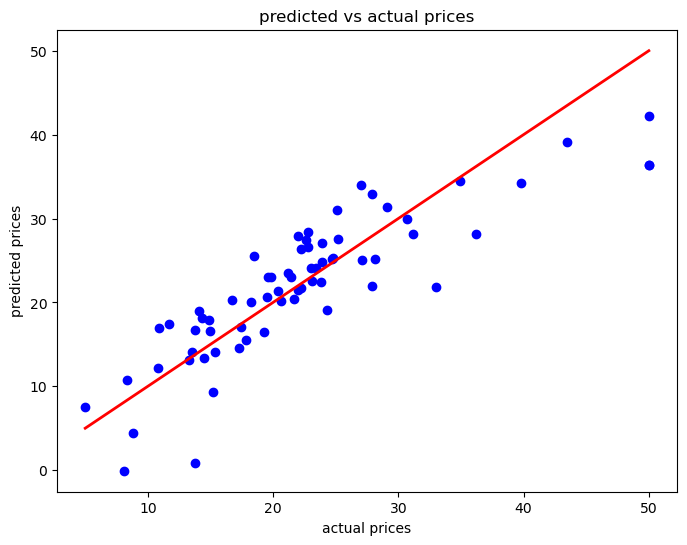

In [16]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color = 'red', linewidth = 2)
plt.title('predicted vs actual prices')
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.show()